In [ ]:

##Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

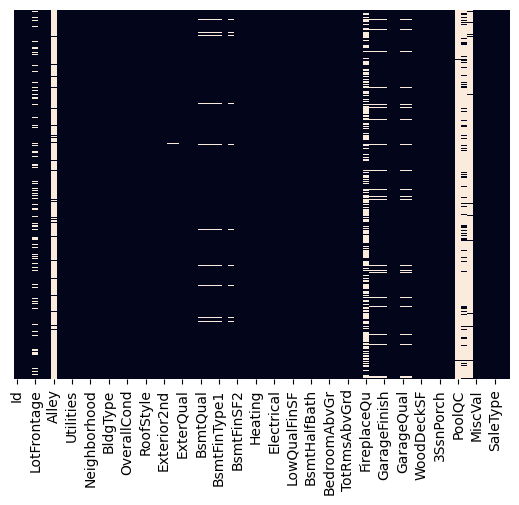

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
## Preparing the data

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

df.drop(['Alley'],axis=1,inplace=True)

<Axes: >

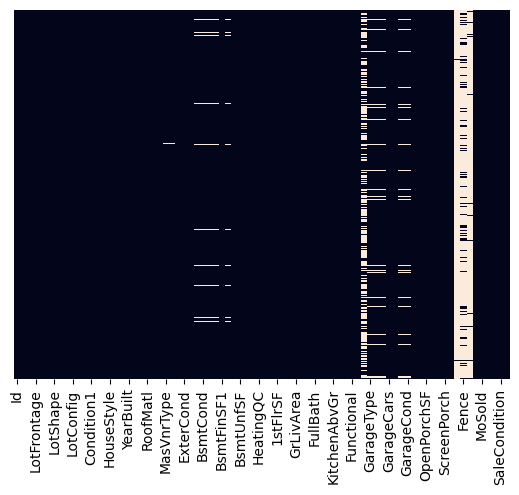

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

In [ ]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)


<Axes: >

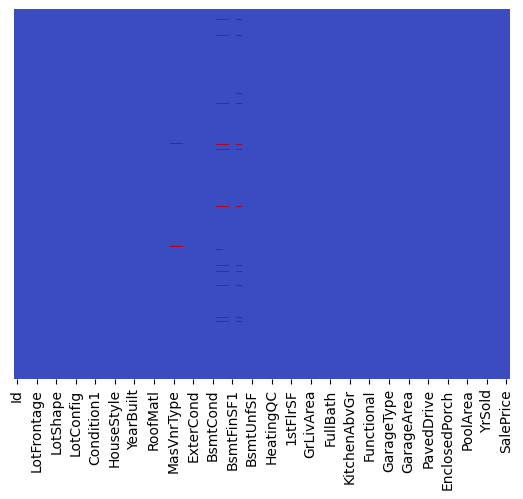

In [ ]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
df.shape

(1460, 76)

In [ ]:
df.drop(['Id'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

<Axes: >

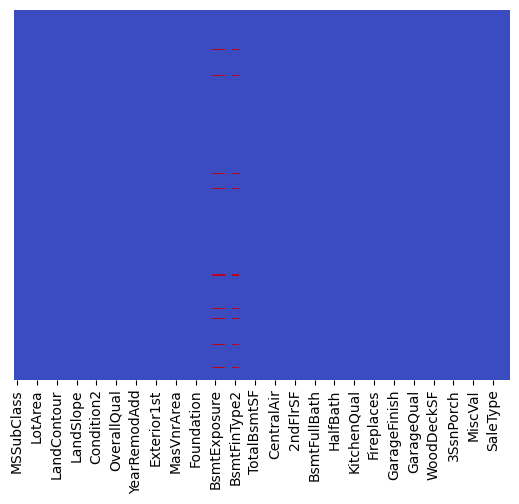

In [ ]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

<Axes: >

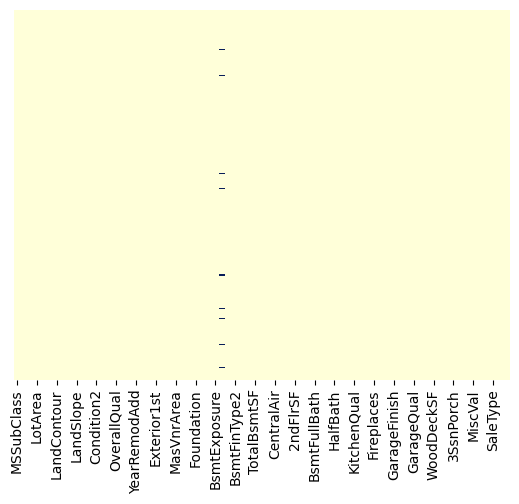

In [ ]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1422, 75)

In [ ]:
## Handle Categorical Features

columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [ ]:
main_df = df.copy()

In [ ]:
## Test Data [Combine]

test_df = pd.read_csv('formulatedtest.csv')
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
final_df = pd.concat([df,test_df],axis=0)

In [ ]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [ ]:
final_df.shape

(2881, 75)

In [ ]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [ ]:
final_df.shape

(2881, 235)

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [ ]:
final_df.shape


(2881, 175)

In [ ]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
df_Train = final_df.iloc[:1422,:]
df_Test = final_df.iloc[1422:,:]

In [ ]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
df_Train.shape

(1422, 175)

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-89-8fdc58f80b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [ ]:
X_train = df_Train.drop(['SalePrice'],axis=1)
y_train = df_Train['SalePrice']

## Artificial Neural Network

In [ ]:
## Importing libraries

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true,y_pred):
  return K.sqrt(K.mean(K.square(y_pred-y_true)))

In [ ]:
# Initiating ANN
classifier = Sequential()

# Adding input and first hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 174))

# Adding second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform', activation = 'relu'))

# Adding third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation = 'relu'))

# Adding output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform'))



In [ ]:
# Compile ANN
classifier.compile(loss = root_mean_squared_error, optimizer = 'Adamax')

# Fitting ANN
model_histor = classifier.fit(X_train.values, y_train.values, validation_split = 0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
114/114 [==============================] - 2s 6ms/step - loss: 178583.4844 - val_loss: 150473.6250
Epoch 2/1000
114/114 [==============================] - 0s 3ms/step - loss: 101958.8281 - val_loss: 69734.2109
Epoch 3/1000
114/114 [==============================] - 0s 2ms/step - loss: 71253.7969 - val_loss: 67714.3750
Epoch 4/1000
114/114 [==============================] - 0s 4ms/step - loss: 69012.6016 - val_loss: 65998.4062
Epoch 5/1000
114/114 [==============================] - 0s 3ms/step - loss: 66496.1328 - val_loss: 64442.4414
Epoch 6/1000
114/114 [==============================] - 0s 4ms/step - loss: 64697.4062 - val_loss: 63090.5469
Epoch 7/1000
114/114 [==============================] - 0s 3ms/step - loss: 62540.9688 - val_loss: 61805.6367
Epoch 8/1000
114/114 [==============================] - 0s 3ms/step - loss: 60202.2305 - val_loss: 60804.2227
Epoch 9/1000
114/114 [==============================] - 0s 4ms/step - loss: 59293.9961 - val_loss: 59585.8164
Epoch 1

In [ ]:
ann_pred = classifier.predict(df_Test.values)

46/46 [==============================] - 0s 2ms/step


In [ ]:
# Submission file
pred = pd.DataFrame(ann_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission_1.csv',index=False)